In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from dython import nominal

In [2]:
data = pd.read_csv('model_dat.csv')

In [3]:
data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335.0,6.0,2.0,46135
1,BMW,2011,300.0,6.0,2.0,40650
2,BMW,2011,300.0,6.0,2.0,36350
3,BMW,2011,230.0,6.0,2.0,29450
4,BMW,2011,230.0,6.0,2.0,34500
...,...,...,...,...,...,...
8614,Acura,2012,300.0,6.0,4.0,46120
8615,Acura,2012,300.0,6.0,4.0,56670
8616,Acura,2012,300.0,6.0,4.0,50620
8617,Acura,2013,300.0,6.0,4.0,50920


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8619 entries, 0 to 8618
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             8619 non-null   object 
 1   Year              8619 non-null   int64  
 2   Horsepower        8619 non-null   float64
 3   Engine Cylinders  8619 non-null   float64
 4   Number of Doors   8619 non-null   float64
 5   Price             8619 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 404.1+ KB


In [5]:
# Treating all the nominal variables at once using dummy variables
MLDATA=pd.get_dummies(data)

# Printing sample rows
MLDATA

,Year,Horsepower,Engine Cylinders,Number of Doors,Price,Brand_Acura,Brand_Alfa Romeo,Brand_Audi,Brand_BMW,Brand_Buick,...,Brand_Plymouth,Brand_Pontiac,Brand_Porsche,Brand_Saab,Brand_Scion,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2011,335.0,6.0,2.0,46135,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,40650,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,36350,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,29450,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,34500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,2012,300.0,6.0,4.0,46120,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8615,2012,300.0,6.0,4.0,56670,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8616,2012,300.0,6.0,4.0,50620,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8617,2013,300.0,6.0,4.0,50920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Printing all the column names for our reference
MLDATA.columns

Index(['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors', 'Price',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
#Extract Response and Predictors
TargetVariable='Price'
Predictors = ['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo']

y = pd.DataFrame(MLDATA[TargetVariable])
X = pd.DataFrame(MLDATA[Predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
x_test = pd.DataFrame(x_test_scaled)

In [8]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5854.834318223831
RMSE value for k=  2 is: 5255.890410285435
RMSE value for k=  3 is: 5139.493684474502
RMSE value for k=  4 is: 5214.956696485139
RMSE value for k=  5 is: 5266.4159626691235
RMSE value for k=  6 is: 5308.875737793544
RMSE value for k=  7 is: 5346.014216155536
RMSE value for k=  8 is: 5404.396104614639
RMSE value for k=  9 is: 5447.128107563914
RMSE value for k=  10 is: 5496.152751593747
RMSE value for k=  11 is: 5522.422711179148
RMSE value for k=  12 is: 5545.064273120032
RMSE value for k=  13 is: 5575.035721496099
RMSE value for k=  14 is: 5597.121576764967
RMSE value for k=  15 is: 5637.920913224728
RMSE value for k=  16 is: 5692.944538205468
RMSE value for k=  17 is: 5710.1134155050595
RMSE value for k=  18 is: 5768.69940142962
RMSE value for k=  19 is: 5790.6914136140595
RMSE value for k=  20 is: 5815.337513756756


<AxesSubplot:>

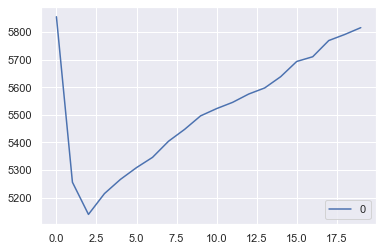

In [9]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [10]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [14]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

In [15]:
KNN=RegModel.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [16]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, y_pred))

R2 Value: 0.8416820907001766
